In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
#import pyActigraphy

# Upload del database

I dati corrispondenti ai primi due giorni li ho skippati in quanto non è stato usato il bracciale

In [2]:
df = pd.read_csv("C:/Users/peppe/Desktop/raw_data/1_week_RAW.csv", skiprows=range(1,13824001))

In [49]:
df

,datetime,x_D,y_D,z_D,x_ND,y_ND,z_ND
0,2017-05-06 00:00:00.000000,-0.242,0.047,0.961,-0.379,0.012,0.910
1,2017-05-06 00:00:00.012500,-0.246,0.043,0.961,-0.383,0.008,0.910
2,2017-05-06 00:00:00.025000,-0.238,0.039,0.961,-0.383,0.004,0.914
3,2017-05-06 00:00:00.037500,-0.238,0.035,0.965,-0.383,0.008,0.914
4,2017-05-06 00:00:00.050000,-0.238,0.035,0.961,-0.383,0.004,0.914
...,...,...,...,...,...,...,...
27647995,2017-05-09 23:59:59.937500,-0.730,0.086,-0.691,0.906,-0.242,0.344
27647996,2017-05-09 23:59:59.950000,-0.727,0.082,-0.695,0.910,-0.242,0.348
27647997,2017-05-09 23:59:59.962500,-0.730,0.078,-0.691,0.902,-0.242,0.340
27647998,2017-05-09 23:59:59.975000,-0.727,0.074,-0.691,0.906,-0.246,0.344


In [3]:
magnitude_D = np.sqrt(np.square(df['x_D']) + np.square(df['y_D']) + np.square(df['z_D'])) #mano dominante
magnitude_ND = np.sqrt(np.square(df['x_ND']) + np.square(df['y_ND']) + np.square(df['z_ND'])) #mano non dominante

In [18]:
magnitude_D.size

27648000

In [29]:
magnitude_Difference=[]
aux=[]
for i in range(0, 191):
    for j in range(144000*i, 144000*(i+1)-1):
        aux.append(magnitude_D[j]-magnitude_ND[j])
    magnitude_Difference.append(np.mean(aux))
    aux.clear()

# Asimmetric index

In [52]:
asimmetric_index = (magnitude_D-magnitude_ND)/(magnitude_D+magnitude_ND)*100

In [53]:
mean_AI_hourly = []
mean_AI_daily = []
# Iterazione attraverso i dati
for i in range(0, 192):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(asimmetric_index[288000*i : 288000*(i+1)-1])
    b=(288000*(i+2))-(288000*(i+1))
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_AI_hourly.append(media_intervallo)

for i in range(0, 4):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(asimmetric_index[6912000*i : 6912000*(i+1)-1])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_AI_daily.append(media_intervallo)


Valori medi orari e giornalieri, rispettivamente

In [54]:
df_AImh=pd.DataFrame(mean_AI_hourly)
df_AImd=pd.DataFrame(mean_AI_daily)

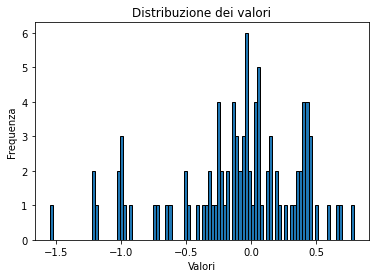

In [55]:
plt.hist(df_AImh, bins=100, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

In [56]:
df_AImh.describe()

,0
count,96.000000
mean,-0.104314
std,0.478523
min,-1.547875
25%,-0.283426
50%,-0.042607
75%,0.203797
max,0.792086


In [57]:
df_AImd.describe()

,0
count,4.000000
mean,-0.104315
std,0.112988
min,-0.219281
25%,-0.188027
50%,-0.109665
75%,-0.025954
max,0.021350


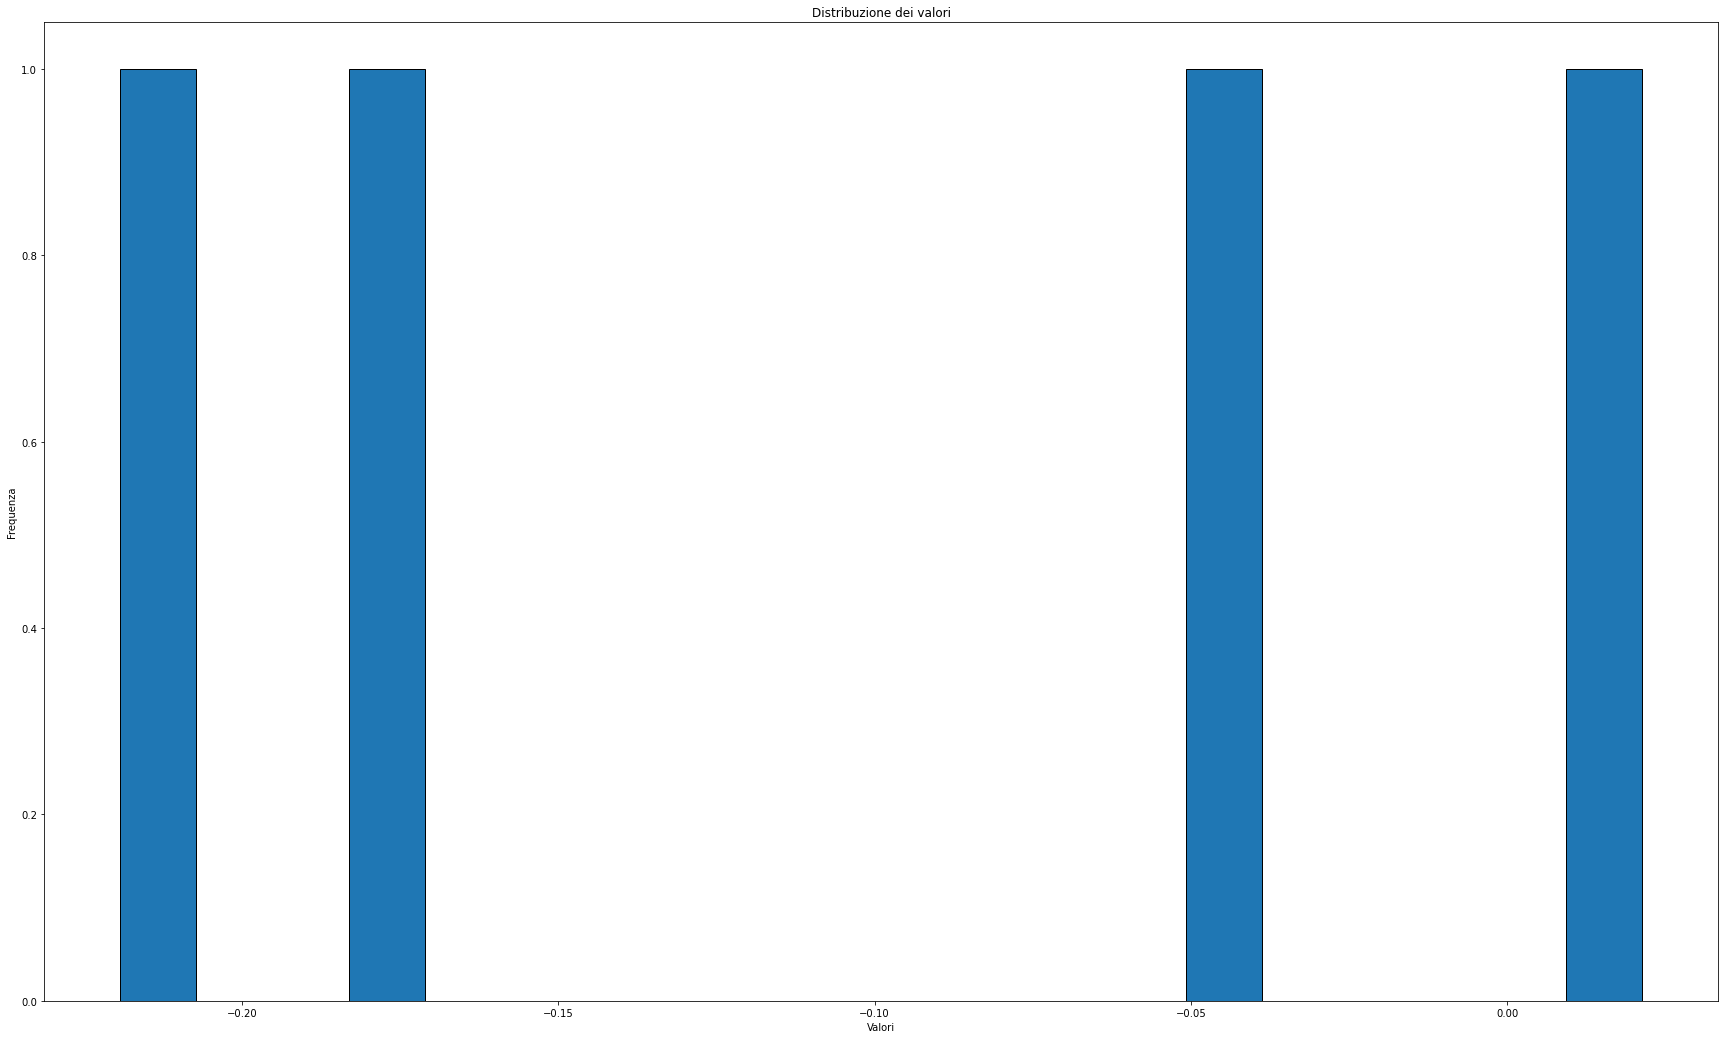

In [58]:
plt.figure(figsize=(30,18))
plt.hist(df_AImd, bins=20, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

Campioni singoli

In [59]:
AIdf = pd.DataFrame(asimmetric_index)

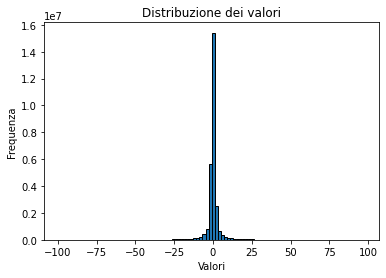

In [60]:
plt.hist(AIdf, bins=100, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

In [61]:
AIdf.describe()

,0
count,2.764800e+07
mean,-1.043154e-01
std,5.363764e+00
min,-9.899052e+01
25%,-1.023401e+00
50%,-5.055453e-02
75%,5.707355e-01
max,9.716654e+01


# Difference index

Rispettivamente elementi singoli, orari e giornalieri

In [62]:
difference_index = (magnitude_D-magnitude_ND)

In [63]:
DIdf = pd.DataFrame(difference_index)

In [64]:
DIdf.describe()

,0
count,2.764800e+07
mean,5.395152e-04
std,1.433053e-01
min,-7.746080e+00
25%,-2.057896e-02
50%,-1.007435e-03
75%,1.147788e-02
max,9.838912e+00


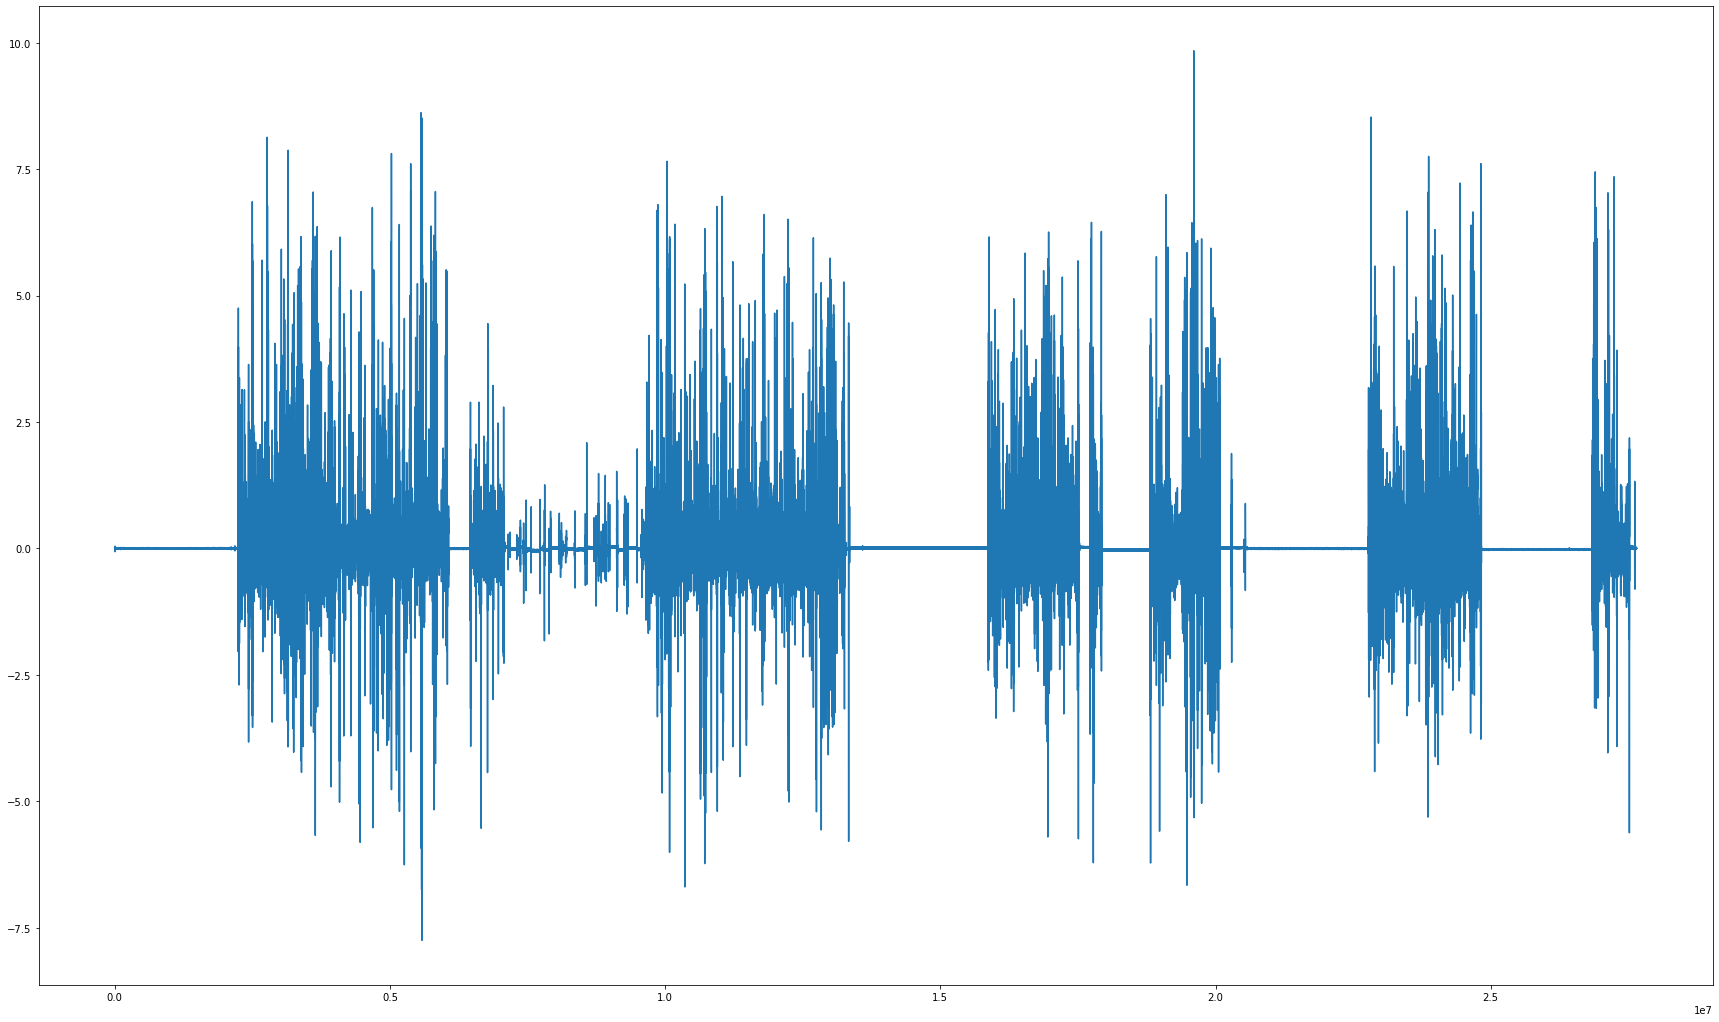

In [65]:
plt.figure(figsize=(30,18))
plt.plot(DIdf)
plt.show()

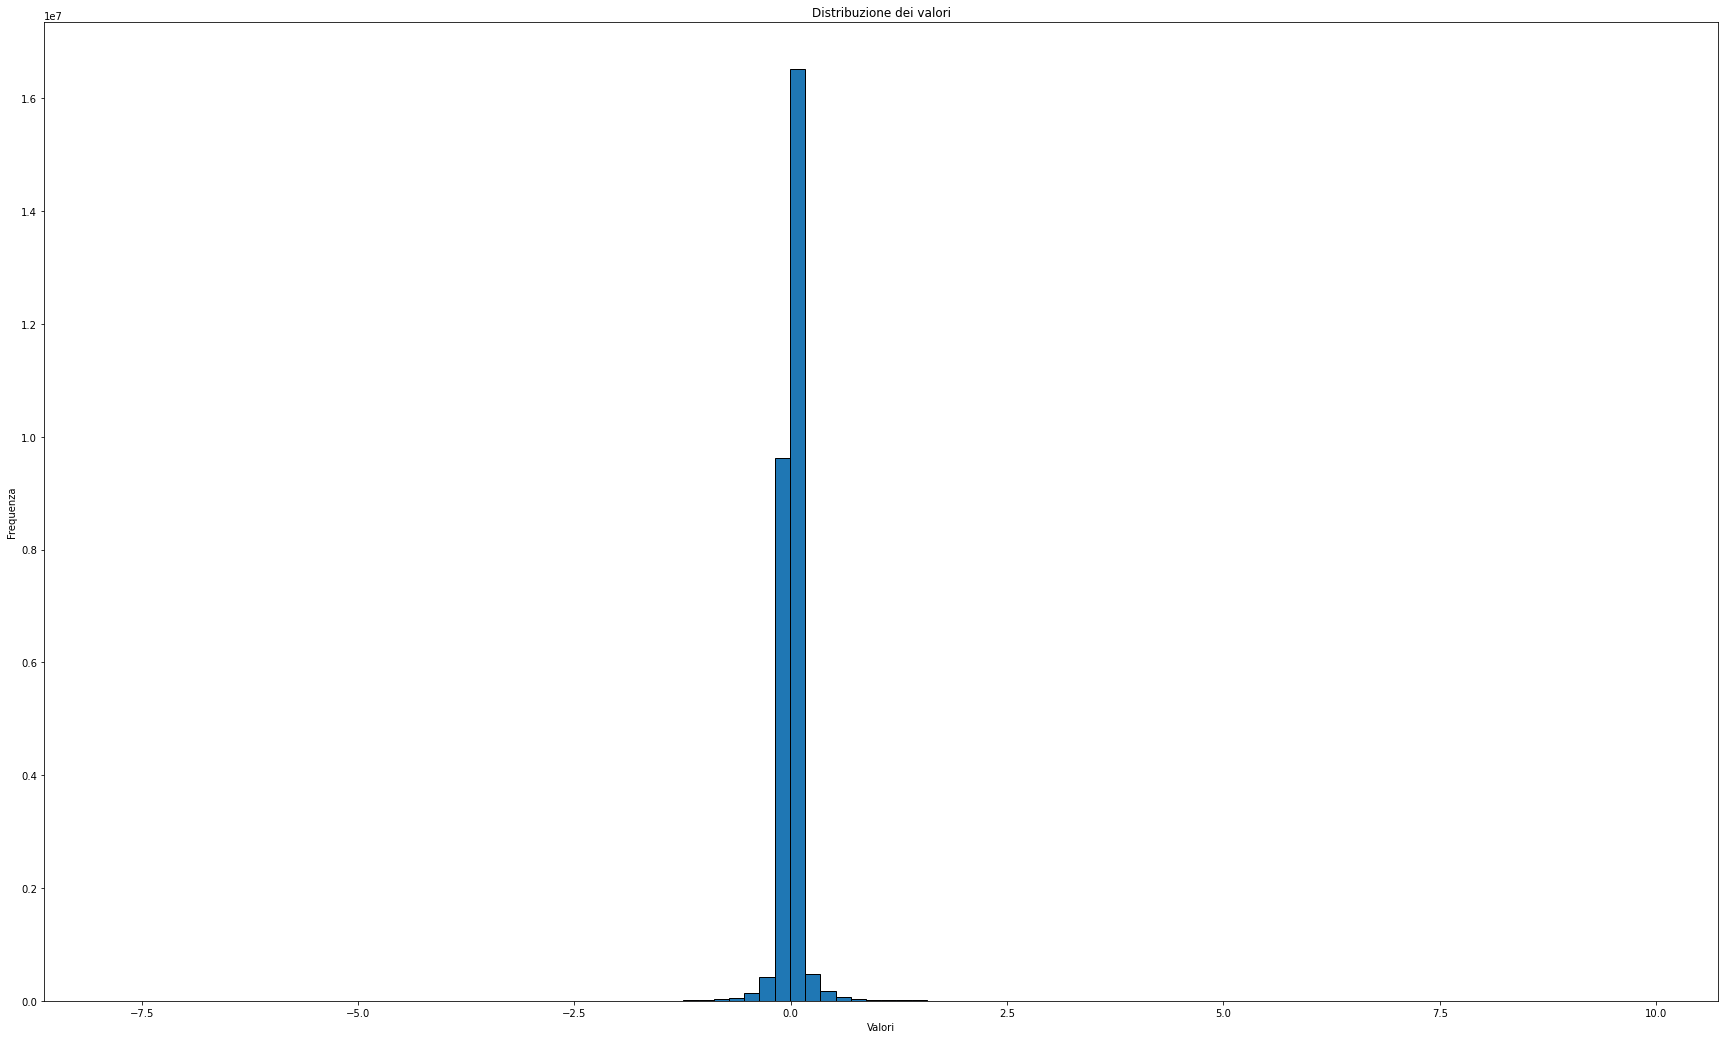

In [66]:
plt.figure(figsize=(30,18))
plt.hist(DIdf, bins=100, edgecolor='black')  # 'bins' indica il numero di barre nell'istogramma
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei valori')
plt.show()

In [67]:
mean_DI_hourly = []
mean_DI_daily = []
# Iterazione attraverso i dati
for i in range(0, 192):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(difference_index[288000*i : 288000*(i+1)-1])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_DI_hourly.append(media_intervallo)

for i in range(0, 4):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(difference_index[6912000*i : 6912000*(i+1)-1])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_DI_daily.append(media_intervallo)

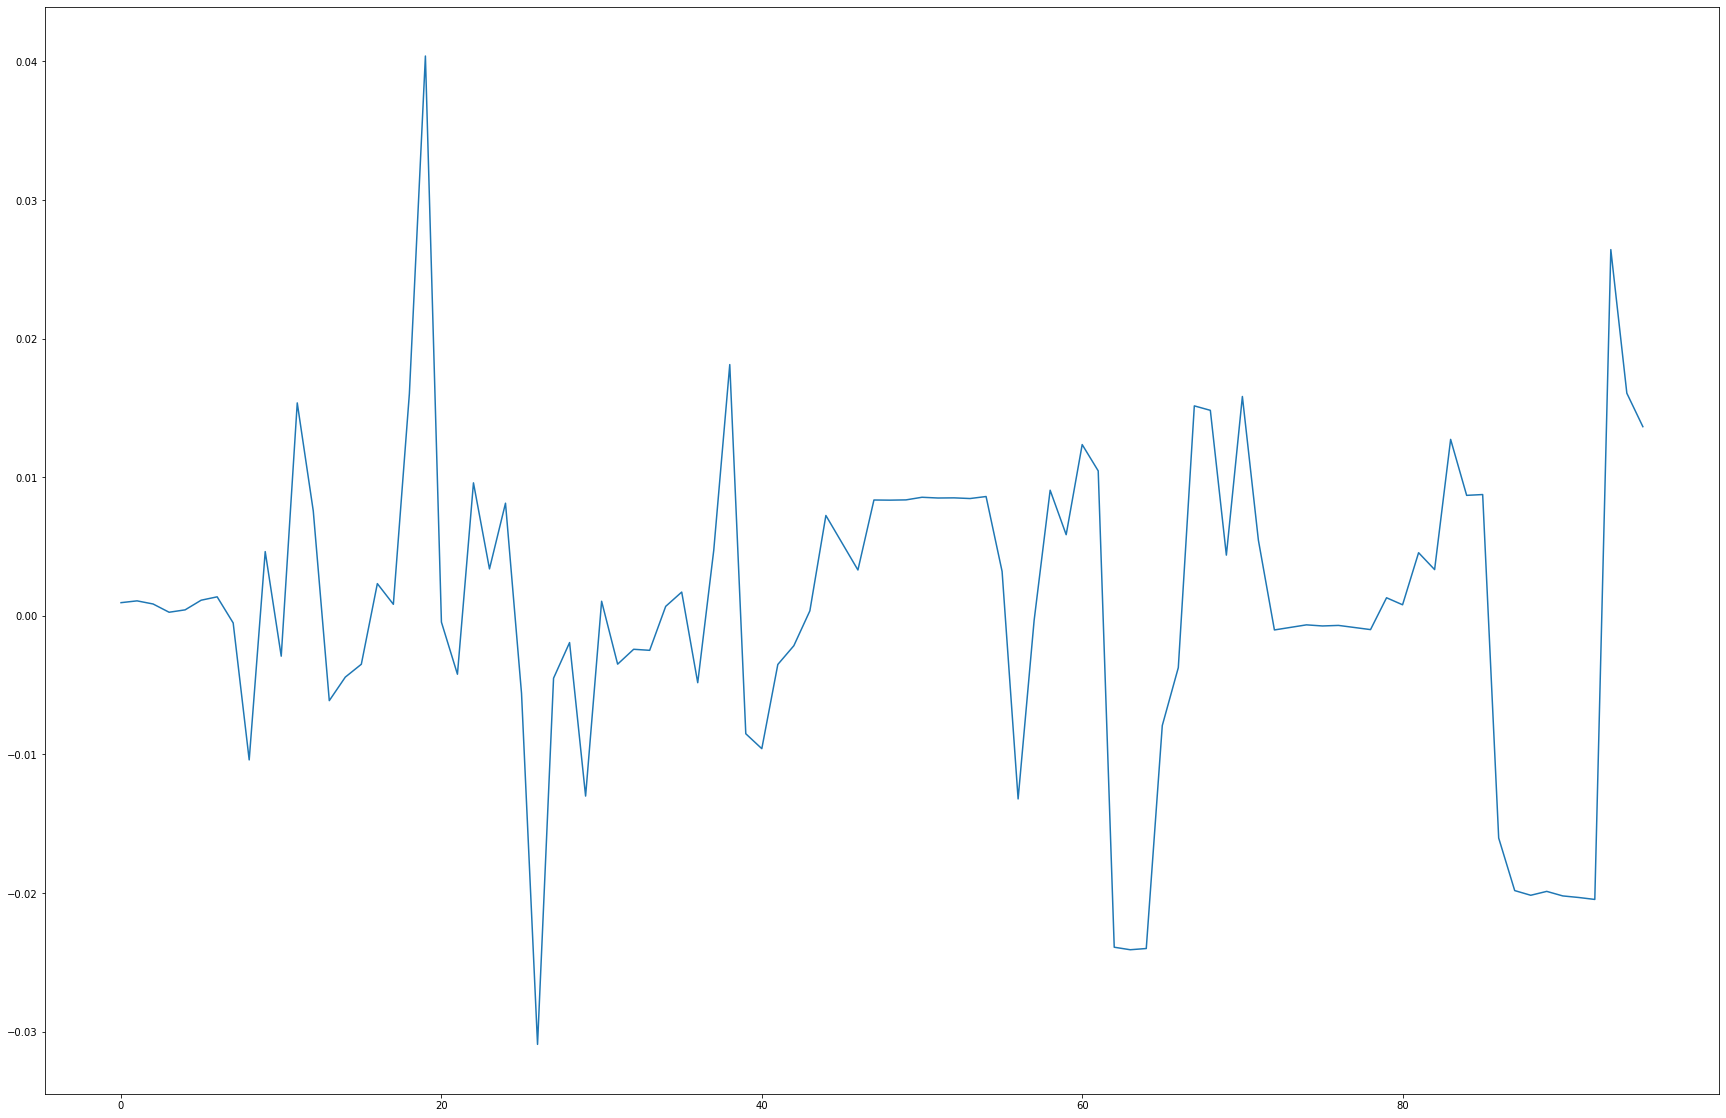

In [68]:
plt.figure(figsize=(30,20))
plt.plot(mean_DI_hourly)

plt.show()

In [69]:
df_DImh=pd.DataFrame(mean_DI_hourly)
df_DImd=pd.DataFrame(mean_DI_daily)

In [70]:
df_DImh.describe()

,0
count,96.000000
mean,0.000540
std,0.011378
min,-0.030928
25%,-0.003570
50%,0.000840
75%,0.008347
max,0.040394


In [71]:
df_DImd.describe()

,0
count,4.000000
mean,0.000540
std,0.002580
min,-0.001935
25%,-0.001547
50%,0.000513
75%,0.002600
max,0.003067


# Indice non utilizzato: BAUI

Proposto da Francesca, da implementare in un successivo momento in caso

In [72]:
BAUI=magnitude_ND/magnitude_D

In [73]:
BAUIdf = pd.DataFrame(BAUI)

In [74]:
BAUIdf.describe()

,0
count,2.764800e+07
mean,1.008902e+00
std,1.607620e-01
min,1.437089e-02
25%,9.886501e-01
50%,1.001012e+00
75%,1.020680e+00
max,1.971222e+02


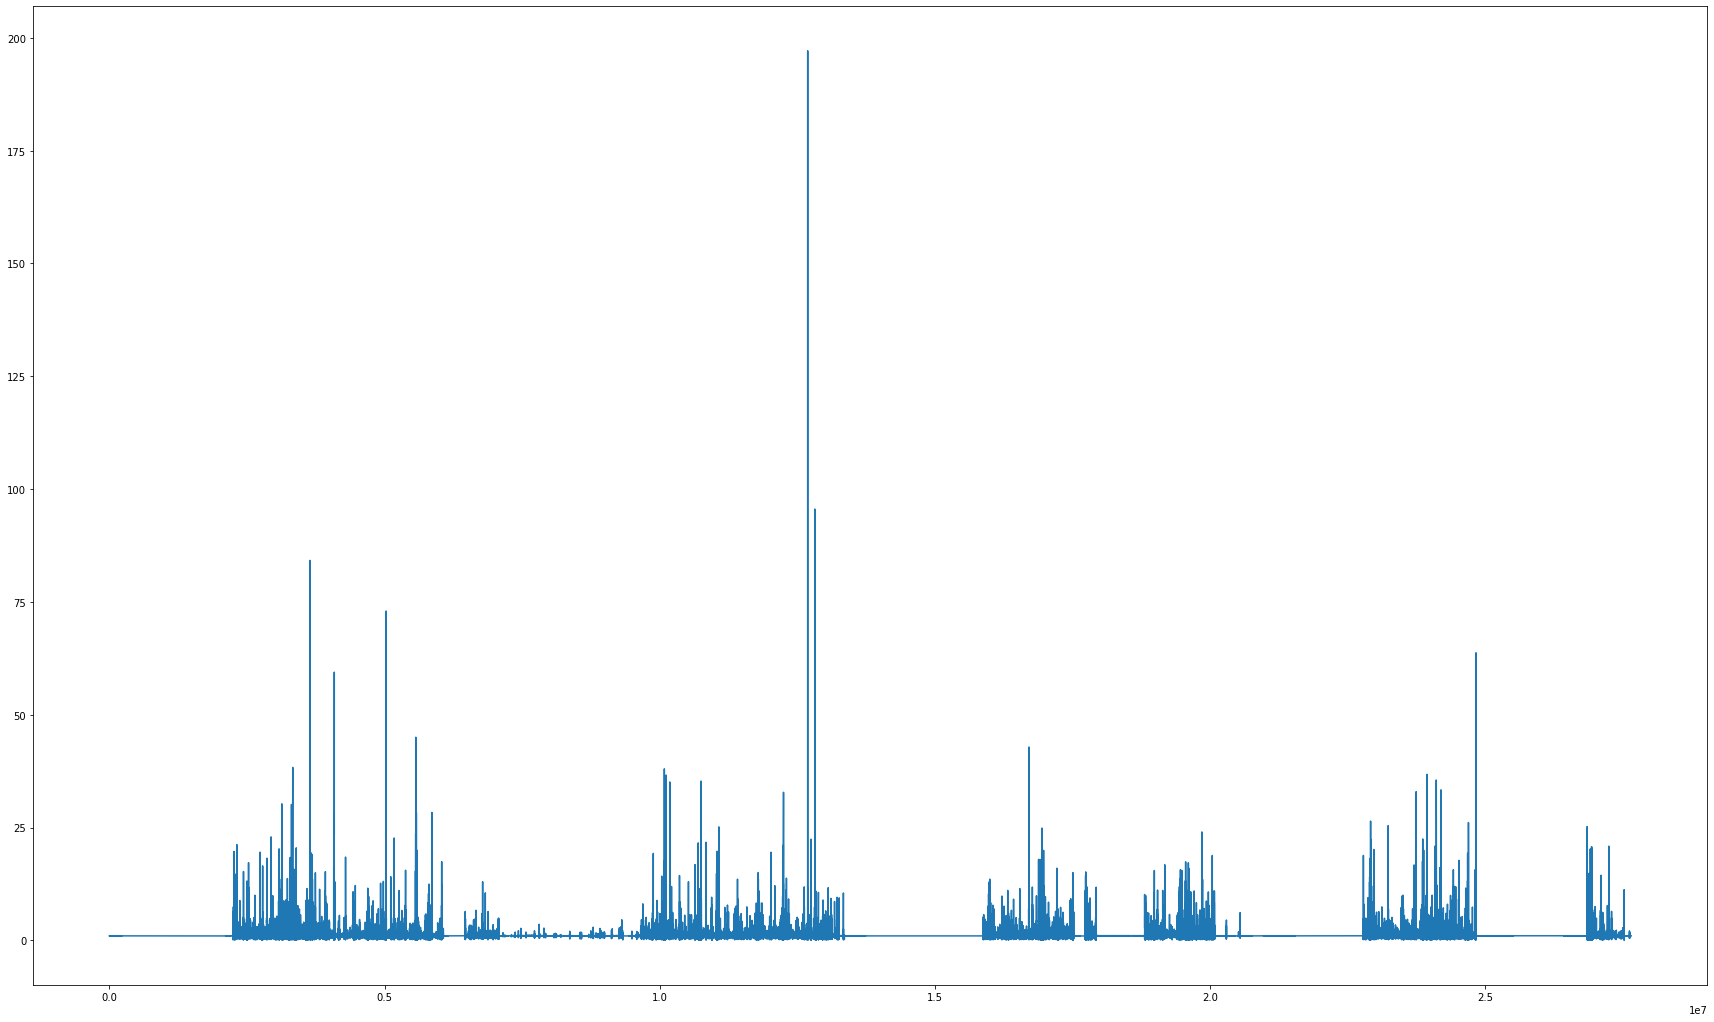

In [75]:
plt.figure(figsize=(30,18))
plt.plot(BAUIdf)
plt.show()

In [76]:
BAUIdf.describe()

,0
count,2.764800e+07
mean,1.008902e+00
std,1.607620e-01
min,1.437089e-02
25%,9.886501e-01
50%,1.001012e+00
75%,1.020680e+00
max,1.971222e+02


In [77]:
mean_BUAI_hourly = []
mean_BUAI_daily = []
# Iterazione attraverso i dati
for i in range(0, 192):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(BAUI[288000*i : 288000*(i+1)-1])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_BUAI_hourly.append(media_intervallo)

for i in range(0, 4):
    # Calcolo della media sull'intervallo specificato
    media_intervallo = np.mean(BAUI[6912000*i : 6912000*(i+1)-1])
    
    
    # Aggiunta della media alla lista mean_AI utilizzando append()
    mean_BUAI_daily.append(media_intervallo)

In [78]:
df_BUAImh=pd.DataFrame(mean_BUAI_hourly)
df_BUAImd=pd.DataFrame(mean_BUAI_daily)

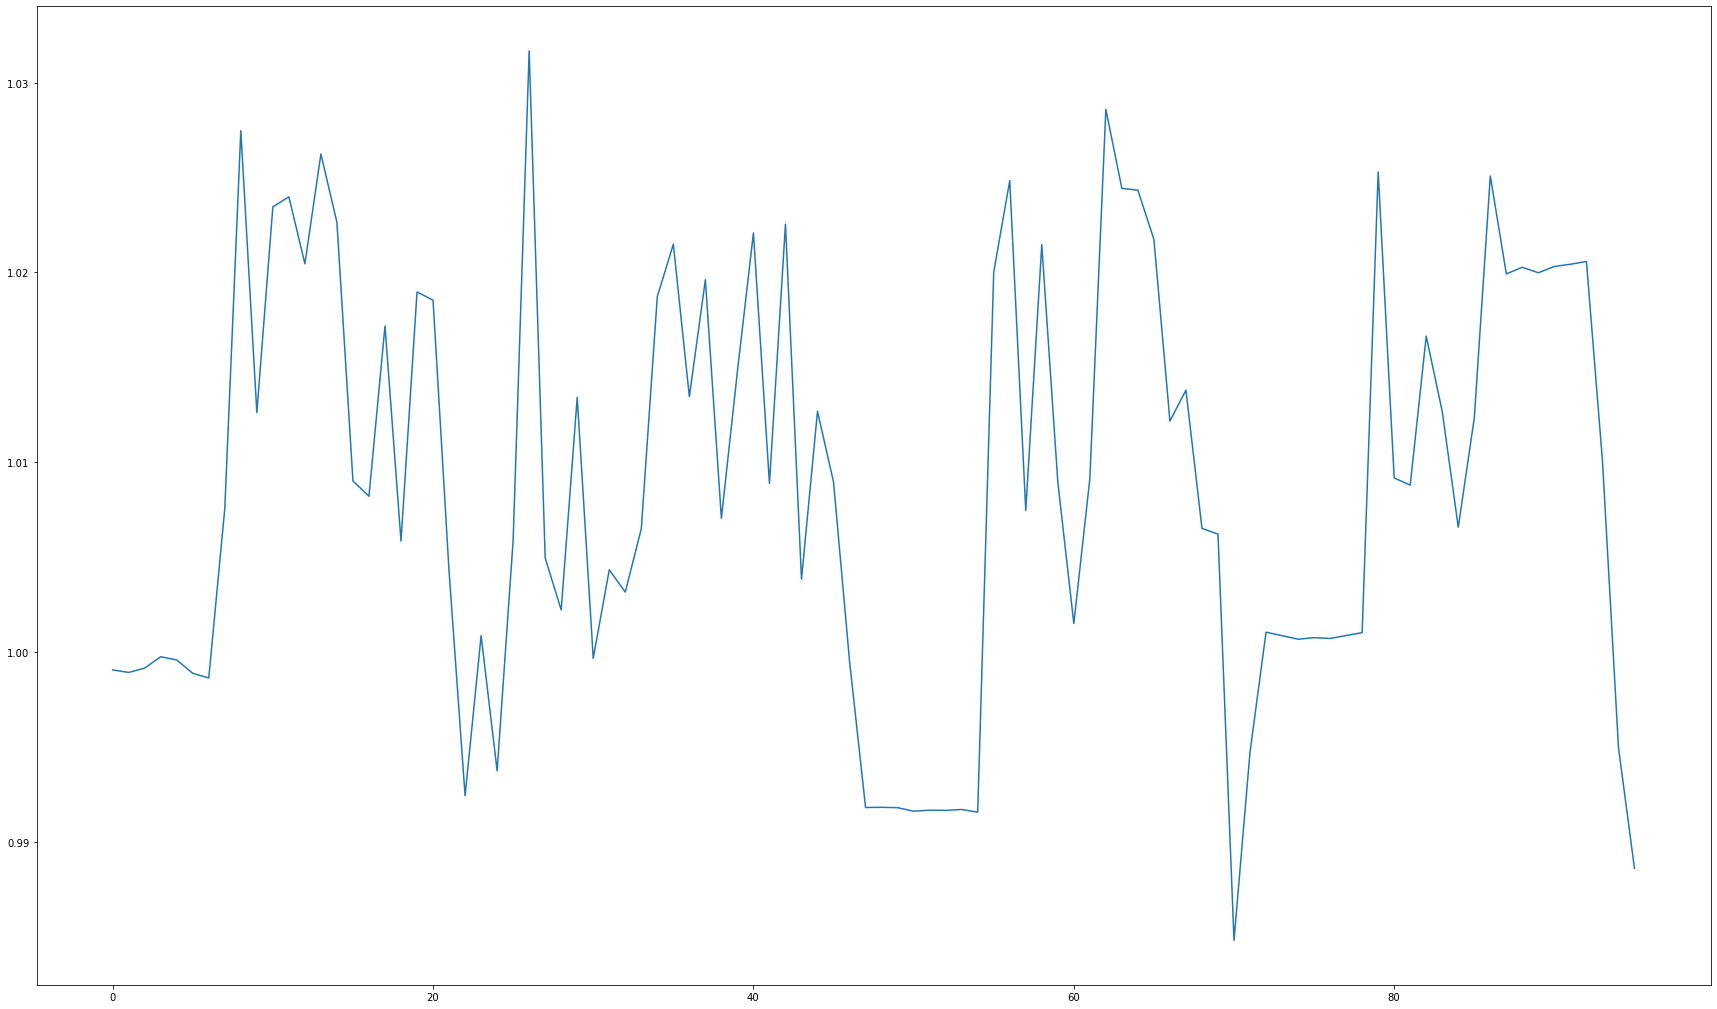

In [79]:
plt.figure(figsize=(30,18))
plt.plot(df_BUAImh)
plt.show()

In [80]:
df_BUAImh.describe()

,0
count,96.000000
mean,1.008902
std,0.011194
min,0.984798
25%,1.000700
50%,1.008497
75%,1.019942
max,1.031684


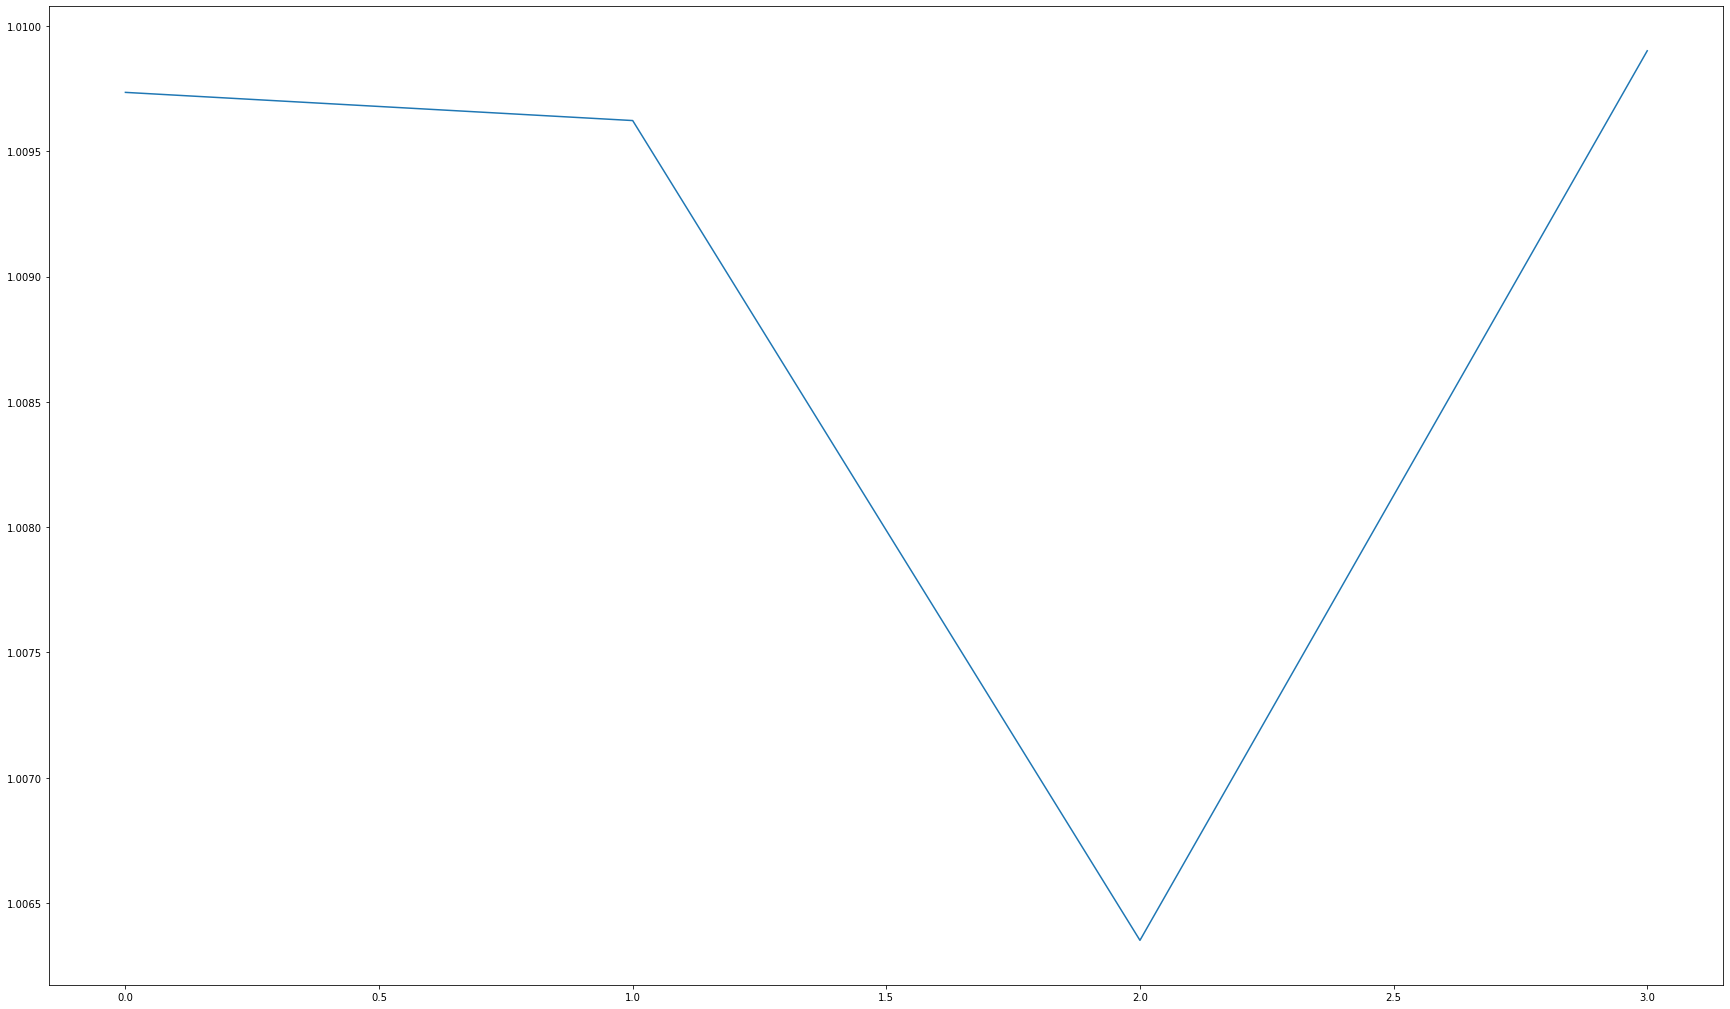

In [81]:
plt.figure(figsize=(30,18))
plt.plot(df_BUAImd)
plt.show()

In [82]:
df_BUAImd.describe()

,0
count,4.000000
mean,1.008902
std,0.001705
min,1.006351
25%,1.008805
50%,1.009679
75%,1.009777
max,1.009901


# log jerk

In [4]:
sample_period=0.0125
sample_seconds=np.arange(0, magnitude_D.size*sample_period, sample_period)

In [5]:
sample_seconds

array([0.00000000e+00, 1.25000000e-02, 2.50000000e-02, ...,
       3.45599963e+05, 3.45599975e+05, 3.45599988e+05])

In [6]:
jerk_x_D=np.diff(df["x_D"])/np.diff(sample_seconds)
jerk_y_D=np.diff(df["y_D"])/np.diff(sample_seconds)
jerk_z_D=np.diff(df["z_D"])/np.diff(sample_seconds)

jerk_x_ND=np.diff(df["x_ND"])/np.diff(sample_seconds)
jerk_y_ND=np.diff(df["y_ND"])/np.diff(sample_seconds)
jerk_z_ND=np.diff(df["z_ND"])/np.diff(sample_seconds)

jerk_D= np.sqrt(np.square(jerk_x_D)+np.square(jerk_y_D)+np.square(jerk_z_D))
jerk_ND= np.sqrt(np.square(jerk_x_ND)+np.square(jerk_y_ND)+np.square(jerk_z_ND))

In [7]:
jerk_std = np.std(jerk_D[288000+1 : 288000*2])
jerk_std

0.2264787022411738

In [30]:
LDJ_D_hourly = []
LDJ_ND_hourly = []
LDJ_Ratio = []
durata= 144000
# Iterazione attraverso i dati
for i in range(0, 191):

    media_intervallo = np.mean(jerk_D[durata*i : durata*(i+1)-1])
    jerk_std = np.std(jerk_D[durata*i : durata*(i+1)-1])
    
    LDJ_D_hourly.append(np.log(media_intervallo/jerk_std))

    media_intervallo = np.mean(jerk_ND[durata*i : durata*(i+1)-1])
    jerk_std = np.std(jerk_ND[durata*i : durata*(i+1)-1])
    
    LDJ_ND_hourly.append(np.log(media_intervallo/jerk_std))

    LDJ_Ratio.append(LDJ_ND_hourly[i]/LDJ_D_hourly[i])


In [31]:
LDJ_D_hourly

[0.4865985603618312,
 0.4774937744528691,
 0.4930154308972773,
 0.4783018858628988,
 0.4733215785538107,
 0.4660680822039439,
 0.46569963742450465,
 0.4793460585746193,
 0.4883765053713484,
 0.4966388963326038,
 0.4924803228152211,
 0.4967059841997652,
 0.5013036685687179,
 0.5123561132473504,
 0.5047891419371394,
 -1.0633714079097094,
 -0.3838361527102742,
 -0.8023026828662084,
 -0.47943233184979717,
 -0.9143064614270842,
 -0.3993273179292974,
 -0.7672060765886745,
 -0.6936771383661148,
 -0.4797799188256327,
 -0.5001861982937583,
 -0.732958655015613,
 -0.37427523223491044,
 -0.5685827921057072,
 -0.7930517186402339,
 -0.6300159265946066,
 -0.5434466426673713,
 -0.821949592716483,
 -0.9977323996241643,
 -0.9338990187483308,
 -0.8097619199435065,
 -0.6902428264923632,
 -0.3676061077613802,
 -0.9297276344167187,
 -1.0472696762518061,
 -0.9619008601022656,
 -0.7808820787323456,
 -1.1620920230417617,
 -0.5521080435491275,
 0.6519485658805979,
 -1.236808098206967,
 -1.0674265244766359,
 -0.

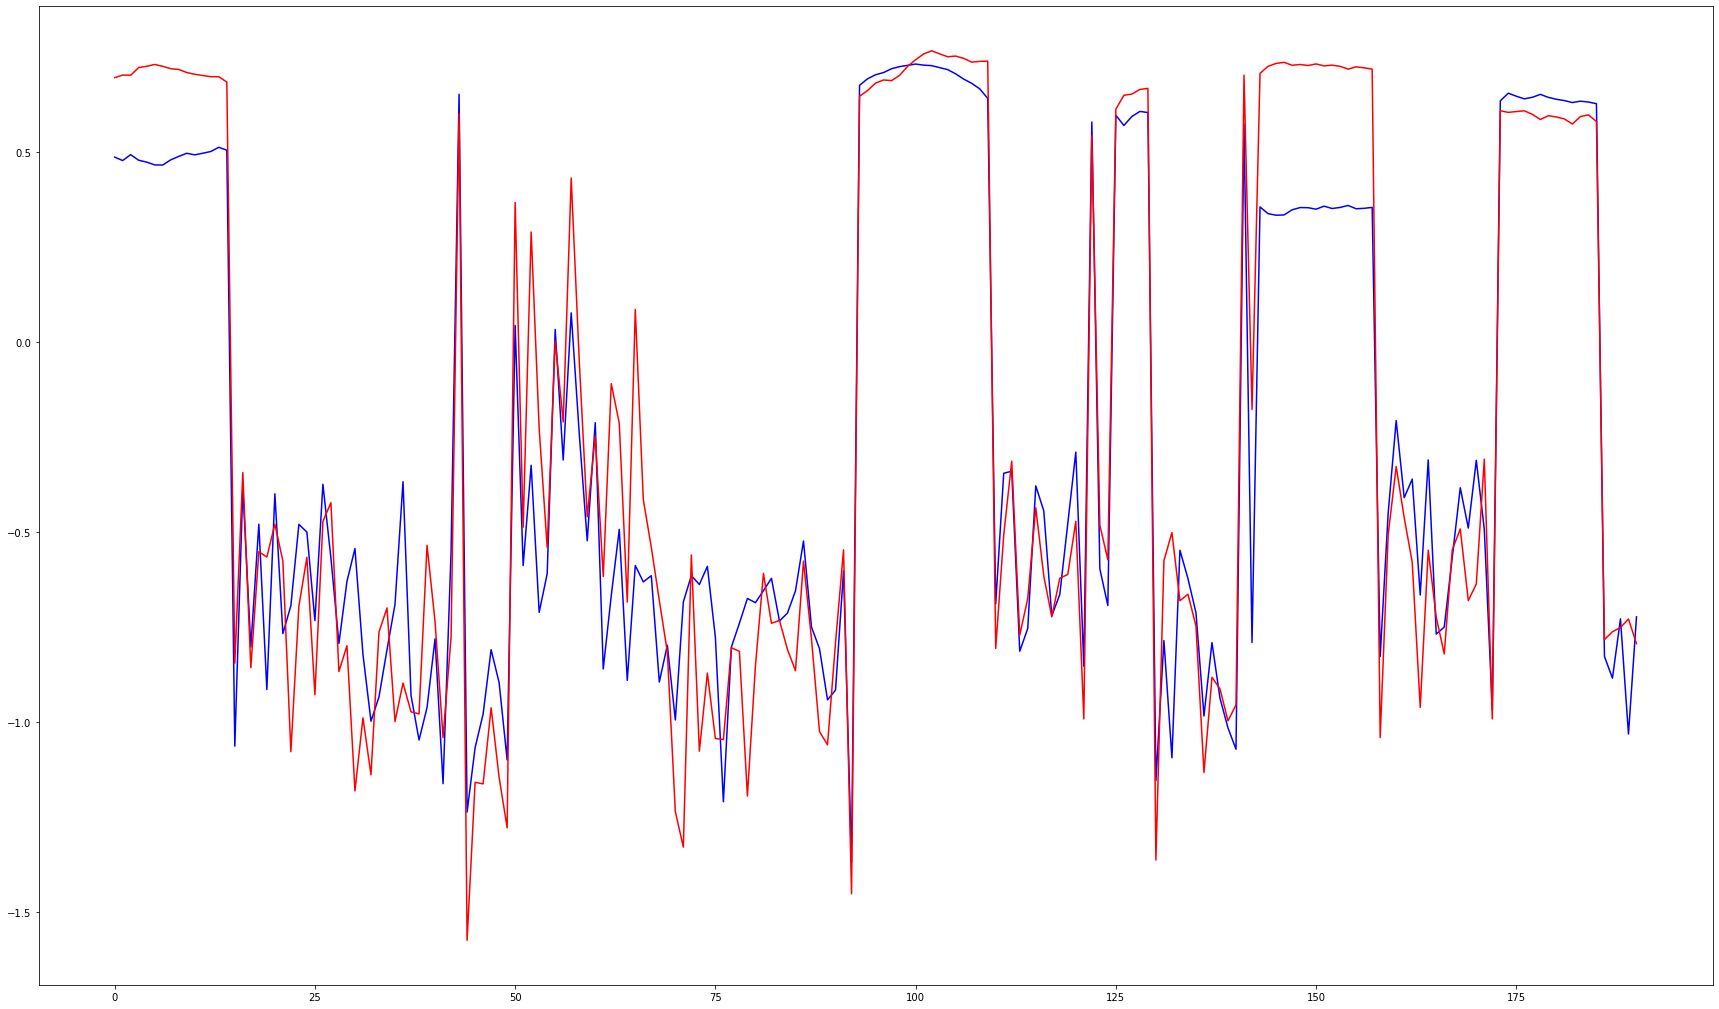

In [32]:
plt.figure(figsize=(30,18))
plt.plot(LDJ_D_hourly, "b", label="Dominant")
plt.plot(LDJ_ND_hourly, "r", label="Non dominant")
plt.show()

In [33]:
LDJ_Difference=[]
for i in range(len(LDJ_D_hourly)):
    LDJ_Difference.append(LDJ_D_hourly[i]-LDJ_ND_hourly[i])

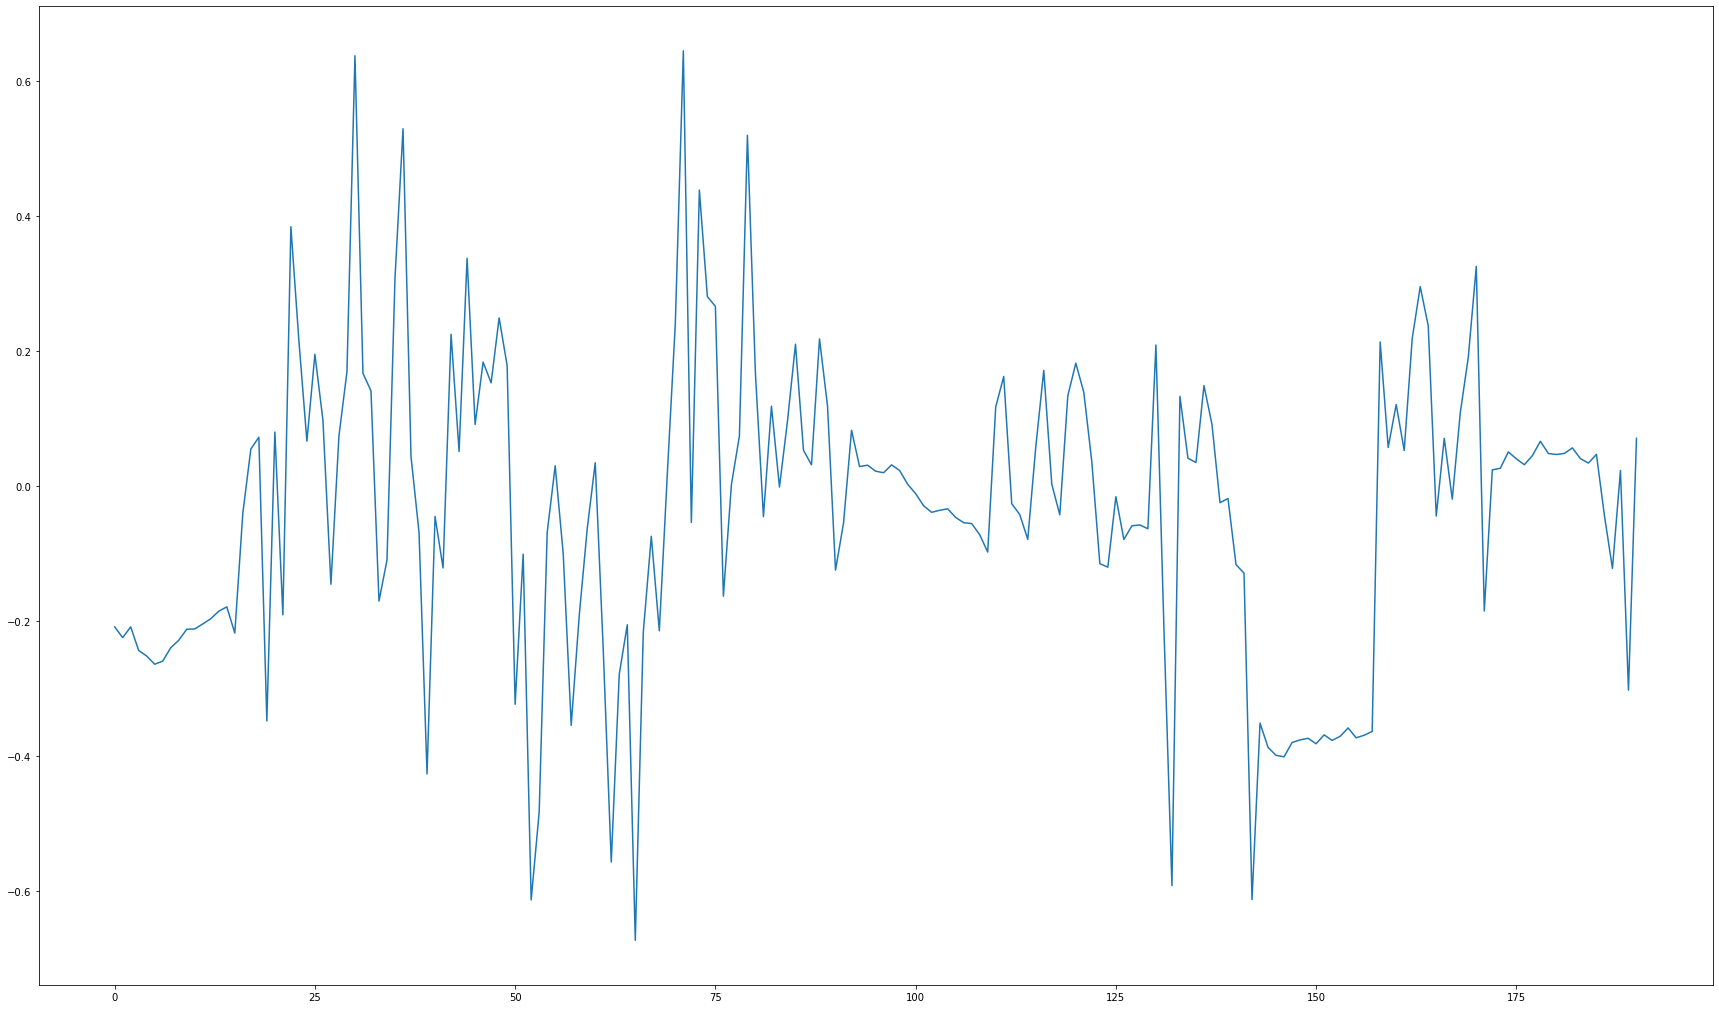

In [34]:
plt.figure(figsize=(30,18))
plt.plot(LDJ_Difference)
plt.show()

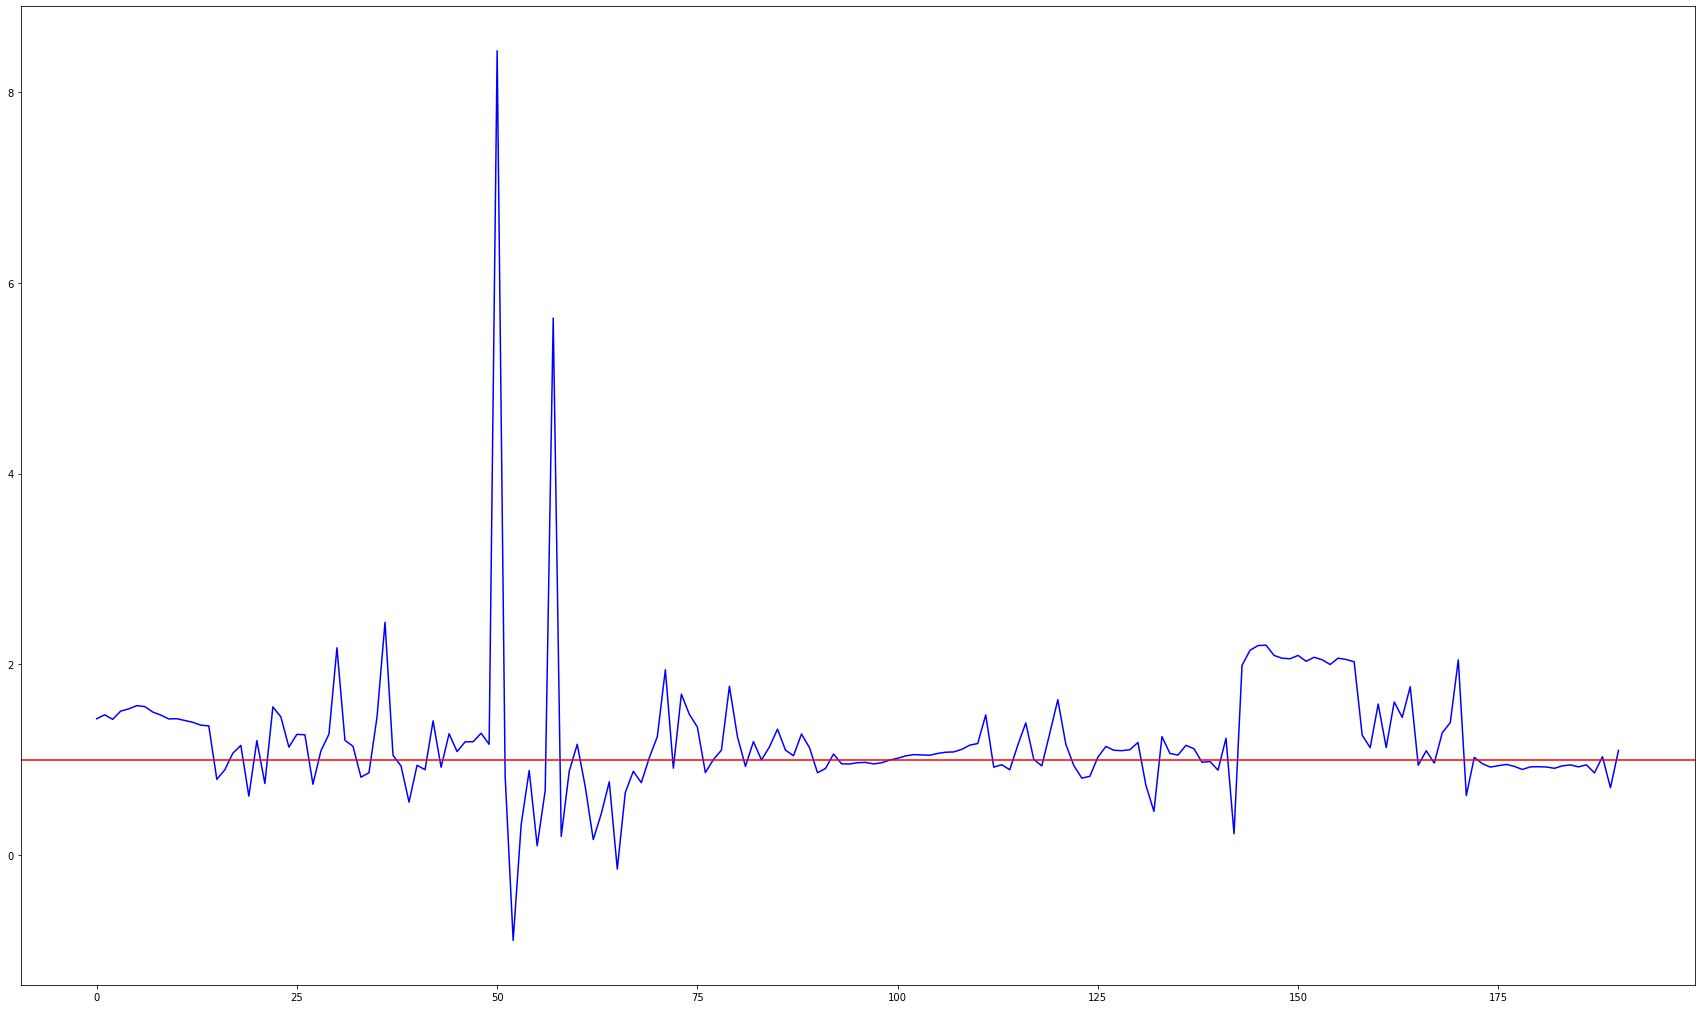

In [35]:
plt.figure(figsize=(30,18))
plt.plot(LDJ_Ratio, "b")
plt.axhline(y=1, color="r")
plt.show()

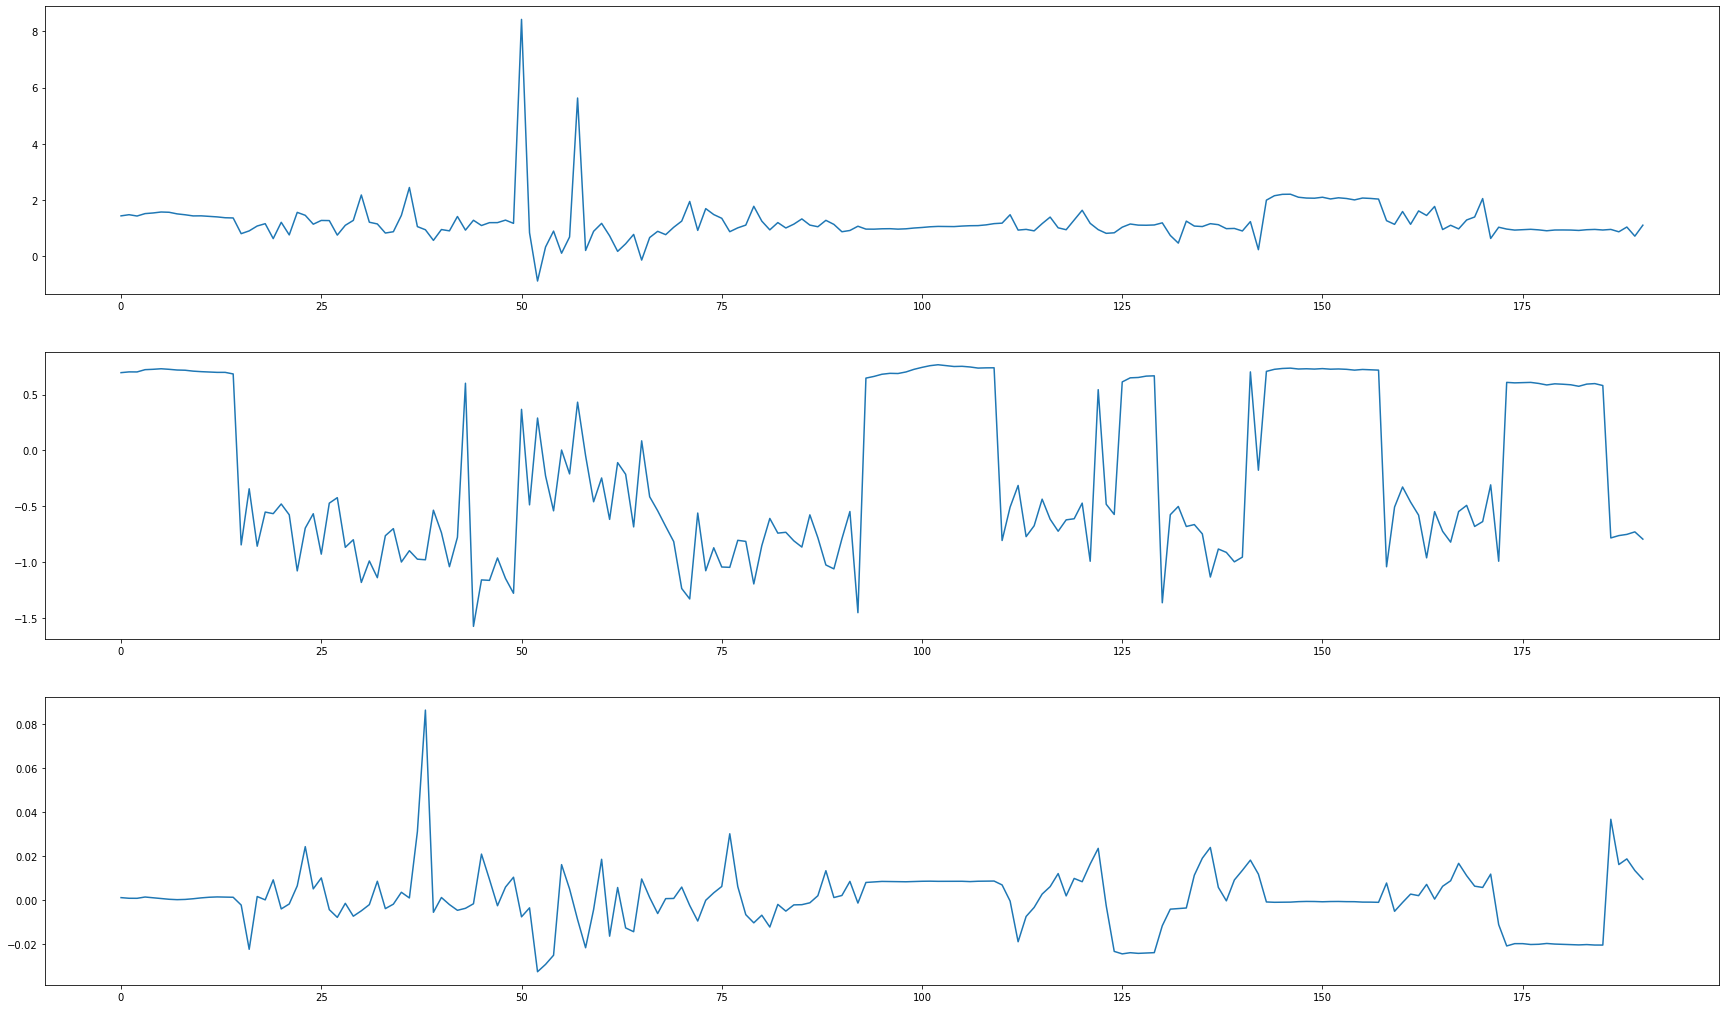

In [37]:

fig= plt.figure(figsize=(30,18))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

ax1.plot(LDJ_Ratio)
ax2.plot(LDJ_ND_hourly)
ax3.plot(magnitude_Difference)

plt.show()